In [ ]:
! pip install --upgrade --no-cache-dir gdown
! gdown 1EqYX552b90gRE6h19xOKLYZgNkPXaxS_

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1EqYX552b90gRE6h19xOKLYZgNkPXaxS_
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 56.2MB/s]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

file = pd.read_csv (r'/content/data_banknote_authentication.txt')
#file = read_file.to_csv (r'/content/data_banknote_authentication.csv')
headerlist = ['feature1' , 'feature2','feature3','feature4','feature5']
file.to_csv("/content/data_banknote_authentication.csv" ,header = headerlist)
df = pd.read_csv("/content/data_banknote_authentication.csv")
df = shuffle(df)


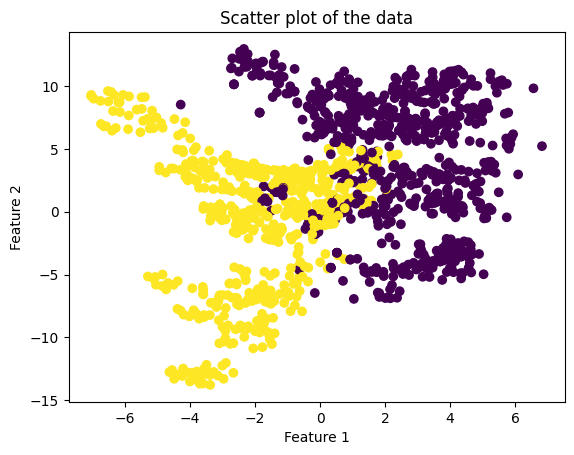

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
features = ["feature1", "feature2", "feature3", "feature4"]
target = "feature5"

# Extracting features and target
X = df[features].values
y = df[target].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

# Training a logistic regression model
logreg_model = LogisticRegression(random_state=83)
logreg_model.fit(X_train, y_train)

# Training a SGDClassifier (Stochastic Gradient Descent)
sgd_model = SGDClassifier(random_state=83)
sgd_model.fit(X_train, y_train)

# Visualization or any additional processing can be added here
# For example, plotting decision boundaries for logistic regression
# (You may need to adapt this depending on the number of features)
plt.scatter(X[:, 0], X[:, 1], c=y)  # Adjust this based on your features
plt.title('Scatter plot of the data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
x_train.shape , x_test.shape , y_train.shape , y_test.shape
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

def bce(y, y_hat):
    loss = -(np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
    return loss

def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

def gradient_descent(w, eta, grads):
    w -= eta * grads
    return w

def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

x_train = np.hstack((np.ones((len(x_train), 1)), x_train))
print(x_train.shape)


(1096, 5)


In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_regression(x, w):
    return sigmoid(x @ w)

def binary_cross_entropy(y, y_hat):
    return -(np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

def compute_gradient(x, y, y_hat):
    return (x.T @ (y_hat - y)) / len(y)

def gradient_descent(w, eta, grads):
    return w - eta * grads

def compute_accuracy(y, y_hat):
    return np.sum(y == np.round(y_hat)) / len(y)

# Assuming x_train, y_train are defined elsewhere in your code
m = 4
w = np.random.randn(m + 1, 1)
print("Initial weights:", w.T[0])

eta = 0.01
n_epochs = 400
error_history = []

for epoch in range(n_epochs):
    y_hat = logistic_regression(x_train, w)

    error = binary_cross_entropy(y_train, y_hat)
    error_history.append(error)

    grads = compute_gradient(x_train, y_train, y_hat)
    w = gradient_descent(w, eta, grads)

    if (epoch + 1) % 100 == 0:
        accuracy = compute_accuracy(y_train, y_hat)
        print(f"Epoch = {epoch + 1}, Error = {error:.4f}, Accuracy = {accuracy:.2%}")

print("Final weights:", w.T[0])


Initial weights: [ 0.04007028 -0.22481541 -1.5496606  -0.72844437  0.77128753]
Epoch = 100, Error = 0.2877, Accuracy = 103021.72%
Epoch = 200, Error = 0.1991, Accuracy = 104025.18%
Epoch = 300, Error = 0.1710, Accuracy = 104359.67%
Epoch = 400, Error = 0.1526, Accuracy = 104526.92%
Final weights: [-0.55191193 -0.25023734 -0.83923084 -1.23007239  0.81183893]


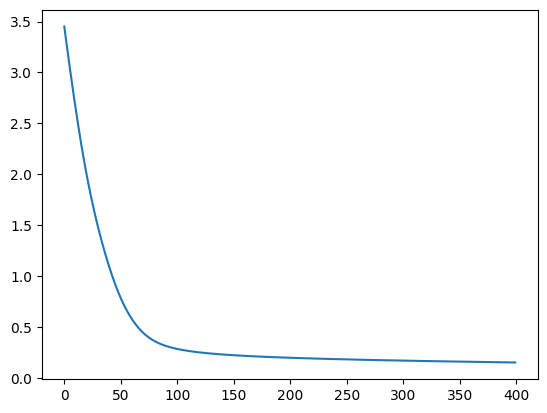

In [ ]:
plt.plot(error_history)

In [ ]:
# Assuming df is your DataFrame and features are 'feature1', 'feature2', 'feature3', 'feature4'

# Calculate the maximum and minimum values for each feature
max_values = df[['feature1', 'feature2', 'feature3', 'feature4']].max()
min_values = df[['feature1', 'feature2', 'feature3', 'feature4']].min()

# Normalize each feature
for i in range(4):
    feature_name = f'feature{i+1}'
    df[feature_name] = (df[feature_name] - min_values[i]) / (max_values[i] - min_values[i])
    print(df[feature_name])


704     0.822541
692     0.619454
297     0.590262
989     0.177769
491     0.375066
          ...   
509     0.765788
124     0.723745
1268    0.354657
956     0.471055
977     0.562567
Name: feature1, Length: 1371, dtype: float64
704     0.399226
692     0.858925
297     0.546573
989     0.644520
491     0.920635
          ...   
509     0.605189
124     0.784825
1268    0.257298
956     0.506542
977     0.526287
Name: feature2, Length: 1371, dtype: float64
704     0.330058
692     0.157387
297     0.462718
989     0.256458
491     0.347001
          ...   
509     0.309169
124     0.175363
1268    0.468921
956     0.228590
977     0.156611
Name: feature3, Length: 1371, dtype: float64
704     0.848679
692     0.619284
297     0.725457
989     0.691125
491     0.496295
          ...   
509     0.843859
124     0.806469
1268    0.734394
956     0.846681
977     0.853500
Name: feature4, Length: 1371, dtype: float64


In [ ]:
X = df[["feature1" ,"feature2" , "feature3" , "feature4"]].values

y = df[["feature5"]].values
X , y

(array([[0.82254145, 0.39922618, 0.33005794, 0.84867927],
        [0.61945352, 0.85892452, 0.15738687, 0.61928403],
        [0.5902617 , 0.54657339, 0.46271782, 0.72545714],
        ...,
        [0.35465749, 0.25729756, 0.4689211 , 0.73439356],
        [0.47105481, 0.50654226, 0.22858996, 0.84668067],
        [0.56256698, 0.52628692, 0.15661145, 0.85350028]]),
 array([[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]]))

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_regression(x, w):
    return sigmoid(x @ w)

def binary_cross_entropy(y, y_hat):
    loss = -(np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
    return loss

def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

def gradient_descent(w, eta, grads):
    w -= eta * grads
    return w

def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

def preprocess_data(X, y, test_size=0.2):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # Add bias column to the training data
    x_train = np.hstack((np.ones((len(x_train), 1)), x_train))

    return x_train, x_test, y_train, y_test

def train_logistic_regression(x_train, y_train, learning_rate=0.01, n_epochs=30000):
    m = x_train.shape[1] - 1  # Number of features
    w = np.random.randn(m + 1, 1)

    error_hist = []
    for epoch in range(n_epochs):
        y_hat = logistic_regression(x_train, w)
        e = binary_cross_entropy(y_train, y_hat)
        error_hist.append(e)

        grads = gradient(x_train, y_train, y_hat)
        w = gradient_descent(w, learning_rate, grads)

        if (epoch + 1) % 100 == 0:
            print(f"Epoch = {epoch}, \t E = {e:.4}, \t w={w.T[0]}")

    return w, error_hist

if __name__ == "__main__":
    # Assuming X, y are defined elsewhere in your code
    x_train, x_test, y_train, y_test = preprocess_data(X, y)
    trained_weights, error_history = train_logistic_regression(x_train, y_train)

    # Test the trained model on the test set
    x_test = np.hstack((np.ones((len(x_test), 1)), x_test))
    y_hat_test = logistic_regression(x_test, trained_weights)

    # Calculate and print accuracy on the test set
    test_accuracy = accuracy(y_test, y_hat_test)
    print(f"Test Accuracy: {test_accuracy:.4%}")


Epoch = 99, 	 E = 0.8328, 	 w=[ 1.34227463 -0.49982091  0.76875895  1.66992031 -1.62716436]
Epoch = 199, 	 E = 0.7161, 	 w=[ 1.14285822 -0.66893174  0.60096314  1.62190457 -1.74955581]
Epoch = 299, 	 E = 0.6707, 	 w=[ 1.03122813 -0.78750169  0.48584669  1.59724771 -1.81119243]
Epoch = 399, 	 E = 0.6518, 	 w=[ 0.9737742  -0.87502982  0.40363568  1.58688258 -1.83587259]
Epoch = 499, 	 E = 0.6423, 	 w=[ 0.94833877 -0.94417432  0.34118883  1.58478984 -1.83901378]
Epoch = 599, 	 E = 0.6362, 	 w=[ 0.94173694 -1.00238053  0.29065602  1.58736807 -1.82968601]
Epoch = 699, 	 E = 0.6313, 	 w=[ 0.94625446 -1.05397124  0.24743235  1.59250452 -1.81315642]
Epoch = 799, 	 E = 0.627, 	 w=[ 0.95735687 -1.10147627  0.20880361  1.59895813 -1.79250512]
Epoch = 899, 	 E = 0.6229, 	 w=[ 0.97235787 -1.14639188  0.17315558  1.60599709 -1.76954938]
Epoch = 999, 	 E = 0.6189, 	 w=[ 0.98965584 -1.18961105  0.13951984  1.61318946 -1.74536835]
Epoch = 1099, 	 E = 0.6151, 	 w=[ 1.00829161 -1.23167067  0.10731064  1.

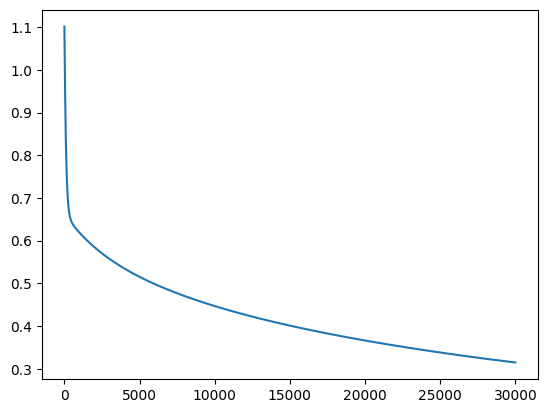

In [ ]:
plt.plot(error_history)

In [ ]:
x_test = np.hstack((np.ones((len(x_test) , 1)), x_test))
x_test.shape


(275, 6)

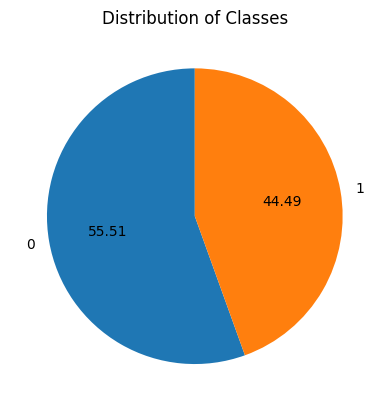

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'y' is a pandas Series
new_y = pd.DataFrame(y, columns=['Column_A'])
value_counts = new_y['Column_A'].value_counts()

# Plotting a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct="%.2f", startangle=90)
plt.title("Distribution of Classes")
plt.show()


In [ ]:
! pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


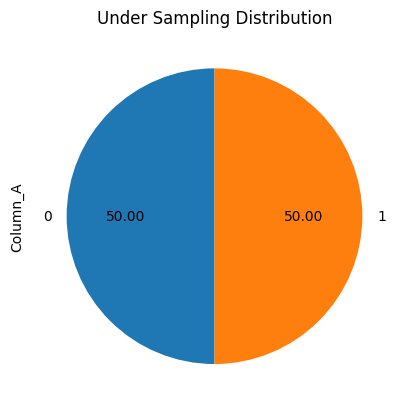

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'y' is a pandas Series
y = pd.DataFrame(y, columns=['Column_A'])

rus = RandomUnderSampler(sampling_strategy=1)
x_res_undersampling, y_res_undersampling = rus.fit_resample(X, y)

# Plotting a pie chart for the undersampled data
ax = y_res_undersampling['Column_A'].value_counts().plot.pie(autopct='%.2f', startangle=90)
ax.set_title("Under Sampling Distribution")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = x_res_undersampling
y = y_res_undersampling
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
#%%
model = LogisticRegression()
model.fit(X , y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming 'model' is a trained model and 'x_test', 'y_test' are your test data
y_hat = model.predict(x_test)

# Using model.score() to calculate accuracy
accuracy_from_score = model.score(x_test, y_test)
print(f"Accuracy from model.score(): {accuracy_from_score:.4%}")

# Reshape y_hat if needed
y_hat = y_hat.reshape(len(y_test), 1)

# Checking shapes
print("Shapes - y_test:", y_test.shape, ", y_hat:", y_hat.shape)

# Using accuracy_score from sklearn.metrics
accuracy_from_metrics = accuracy_score(y_test, y_hat)
print(f"Accuracy from accuracy_score: {accuracy_from_metrics:.4%}")


Accuracy from model.score(): 97.5410%
Shapes - y_test: (244, 1) , y_hat: (244, 1)
Accuracy from accuracy_score: 97.5410%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
X = df[["feature1", "feature2", "feature3", "feature4"]].values
y = df["feature5"].values  # Assuming "feature5" is your target column

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=93, solver='sag', max_iter=200)
model.fit(x_train, y_train)

# Make predictions on the test set
y_hat = model.predict(x_test)

# Calculate accuracy using model.score()
accuracy_from_score = model.score(x_test, y_test)
print(f"Accuracy from model.score(): {accuracy_from_score:.4%}")

# Alternatively, calculate accuracy using accuracy_score from sklearn.metrics
accuracy_from_metrics = accuracy_score(y_test, y_hat)
print(f"Accuracy from accuracy_score: {accuracy_from_metrics:.4%}")


Accuracy from model.score(): 97.0909%
Accuracy from accuracy_score: 97.0909%
